In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#load data
df = pd.read_csv(r"C:\Users\USER\Desktop\covid19\covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
# handling missing value
df['Province/State'].fillna('Unknown', inplace=True)
df['Active'] = df['Confirmed'] - df[ 'Deaths'] - df['Recovered']

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.normalize()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Unknown,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Unknown,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Unknown,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Unknown,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Unknown,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,Unknown,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Unknown,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Unknown,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Unknown,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
a = df.Date.value_counts().sort_index()
print(f"the first date is: {a.index[0]}")
print(f"the last date is: {a.index[-1]}")
total_cases = df.loc[:, ['Date', 'Confirmed']].groupby('Date').sum().reset_index()
total_cases


the first date is: 2020-01-22
the last date is: 2020-07-27


,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [6]:
#load a new dataset with the new features
df_1=pd.read_csv(r"C:\Users\USER\Desktop\covid19\worldometer_data.csv")

# Find the common columns
common_columns = set(df) & set(df_1)

# Print the common columns
print("Common columns:")
for column in common_columns:
    print(column)


Common columns:
Country/Region
WHO Region


In [7]:
# Check if the values in the common columns are the same
for column in common_columns:
    if df[column].equals(df_1[column]):
        print(f"The values in the '{column}' column are the same in both datasets.")
    else:
        print(f"The values in the '{column}' column are different in the two datasets.")


# Check for inconsistencies in country names between the two datasets
inconsistent_countries = set(df['Country/Region']) ^ set(df_1['Country/Region'])
print(inconsistent_countries)

# Merge the datasets
merged_df = pd.merge(df, df_1, on='Country/Region', how='outer', suffixes=('_x', '_y'))

# Print the merged dataset
print(merged_df.head())
print(merged_df.columns)
print(merged_df.shape)


The values in the 'Country/Region' column are different in the two datasets.
The values in the 'WHO Region' column are different in the two datasets.
{'DRC', 'Curaçao', 'Burma', 'Channel Islands', 'Mayotte', 'Brunei ', 'UK', 'Congo', 'UAE', 'Congo (Brazzaville)', 'US', 'Palestine', 'Aruba', 'Brunei', 'Kosovo', 'USA', 'St. Vincent Grenadines', 'Turks and Caicos', 'Taiwan', 'China', 'New Caledonia', 'Saint Vincent and the Grenadines', 'West Bank and Gaza', 'Guadeloupe', 'French Guiana', 'Sint Maarten', 'CAR', 'Diamond Princess', 'Myanmar', 'Congo (Kinshasa)', 'Gibraltar', 'Macao', 'Réunion', 'Central African Republic', 'Hong Kong', 'United Arab Emirates', "Cote d'Ivoire", 'Saint Martin', 'Taiwan*', 'Ivory Coast', 'S. Korea', 'Cayman Islands', 'South Korea', 'Martinique', 'Vatican City', 'Faeroe Islands', 'Holy See', 'Bermuda', 'United Kingdom', 'Caribbean Netherlands', 'Falkland Islands', 'French Polynesia', 'Montserrat', 'Isle of Man'}
  Province/State Country/Region       Lat       Lon

In [8]:
# Calculate daily growth rates
merged_df['daily_growth_rate_cases'] = merged_df.groupby('Country/Region')['Confirmed'].pct_change()
merged_df['daily_growth_rate_deaths'] = merged_df.groupby('Country/Region')['Deaths'].pct_change()

# Calculate mortality ratios
merged_df['mortality_ratio'] = merged_df['Deaths'] / merged_df['Confirmed']

# Calculate cases per Population (assuming 'Population' column exists)
merged_df['cases_per_population'] = merged_df['Confirmed'] / merged_df['Population'] * 100000

# Calculate deaths per Population (assuming 'Population' column exists)
merged_df['deaths_per_population'] = merged_df['Deaths'] / merged_df['Population'] * 100000

# Calculate recovery rate
merged_df['recovery_rate'] = merged_df['Recovered'] / merged_df['Confirmed']

# Calculate active case rate
merged_df['active_case_rate'] = merged_df['Active'] / merged_df['Confirmed']


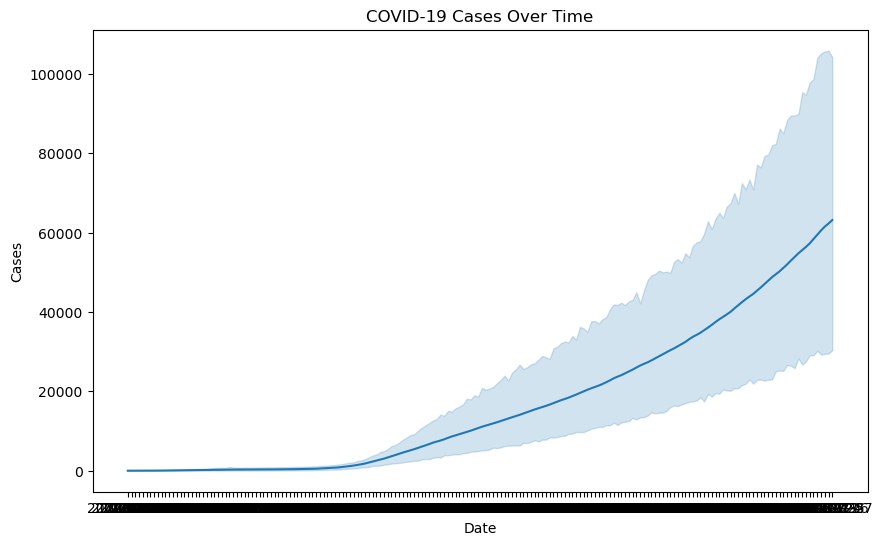

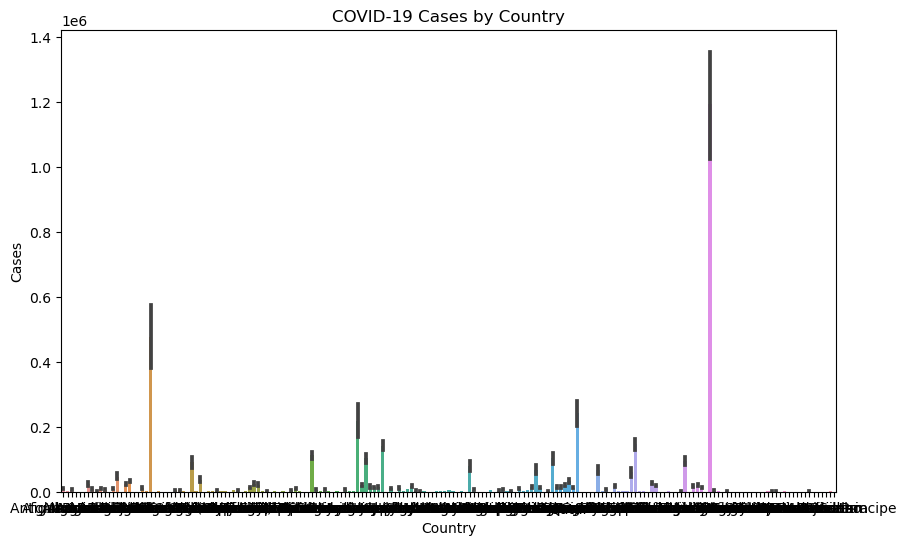

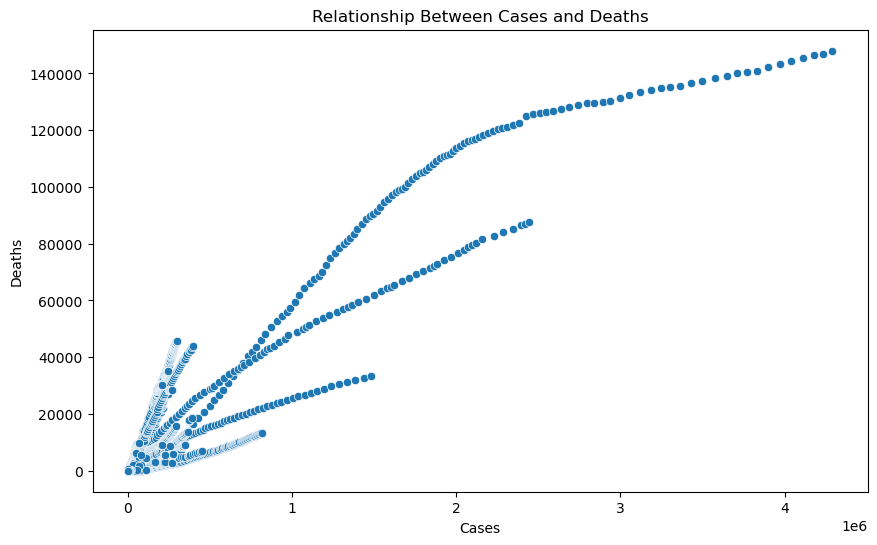

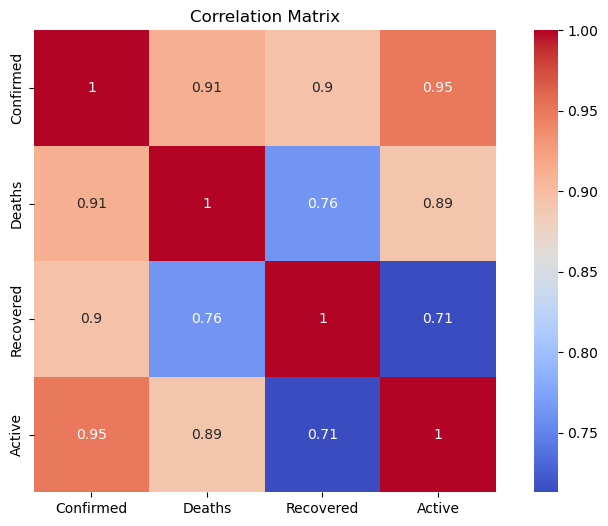

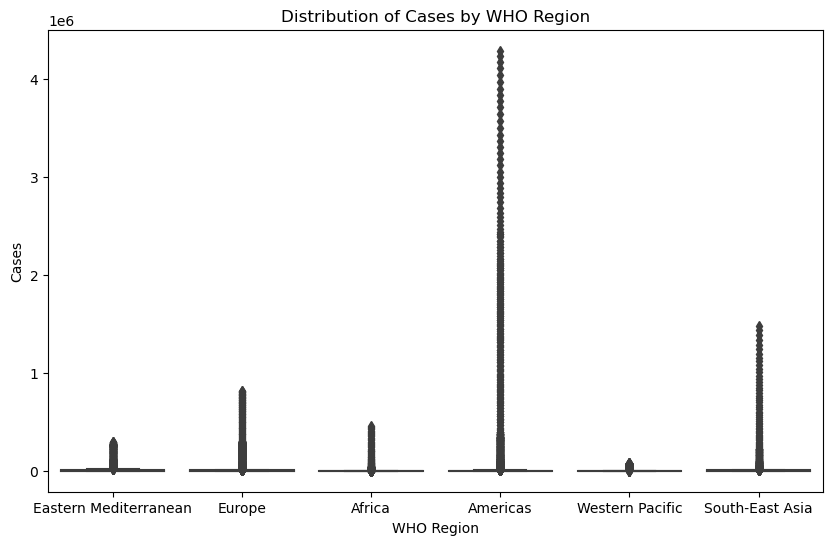

Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64
Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
Spain              3033030
Mexico             1728277
India              1111831
Iran               1024136
Belgium             963679
Name: Deaths, dtype: int64


In [9]:
# Line plot: COVID-19 cases over time
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Confirmed', data=df)
plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

# Bar chart: COVID-19 cases by country
plt.figure(figsize=(10,6))
sns.barplot(x='Country/Region', y='Confirmed', data=df)
plt.title('COVID-19 Cases by Country')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.show()

# Scatter plot: Relationship between cases and deaths
plt.figure(figsize=(10,6))
sns.scatterplot(x='Confirmed', y='Deaths', data=df)
plt.title('Relationship Between Cases and Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

# Heatmap: Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Box plot: Distribution of cases by WHO region
plt.figure(figsize=(10,6))
sns.boxplot(x='WHO Region', y='Confirmed', data=df)
plt.title('Distribution of Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Cases')
plt.show()

# Identify top 10 countries with highest number of cases
top_10_countries = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
print(top_10_countries)

# Identify top 10 countries with highest number of deaths
top_10_deaths = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
print(top_10_deaths)



Text(0.5, 1.0, 'Top 10 countries having most confirmed cases')

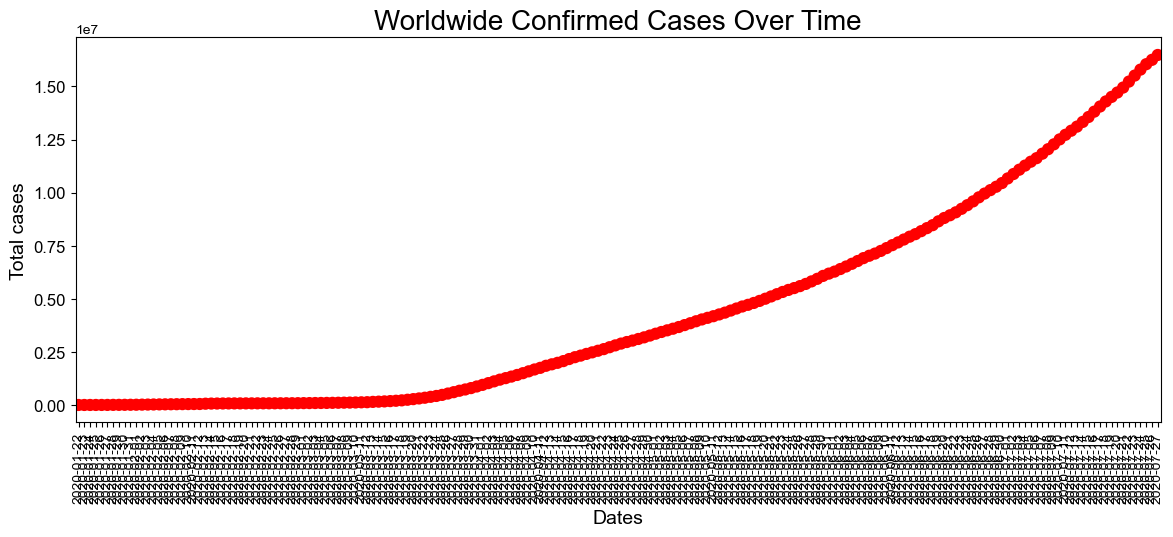

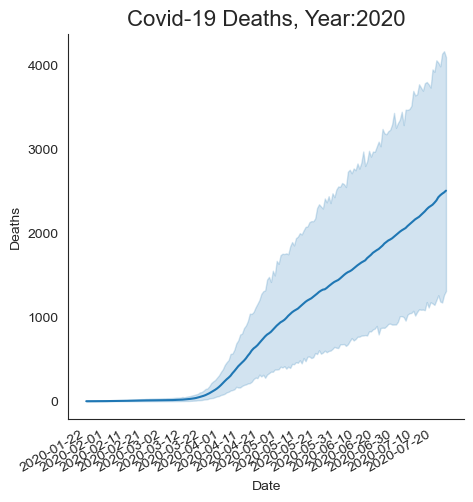

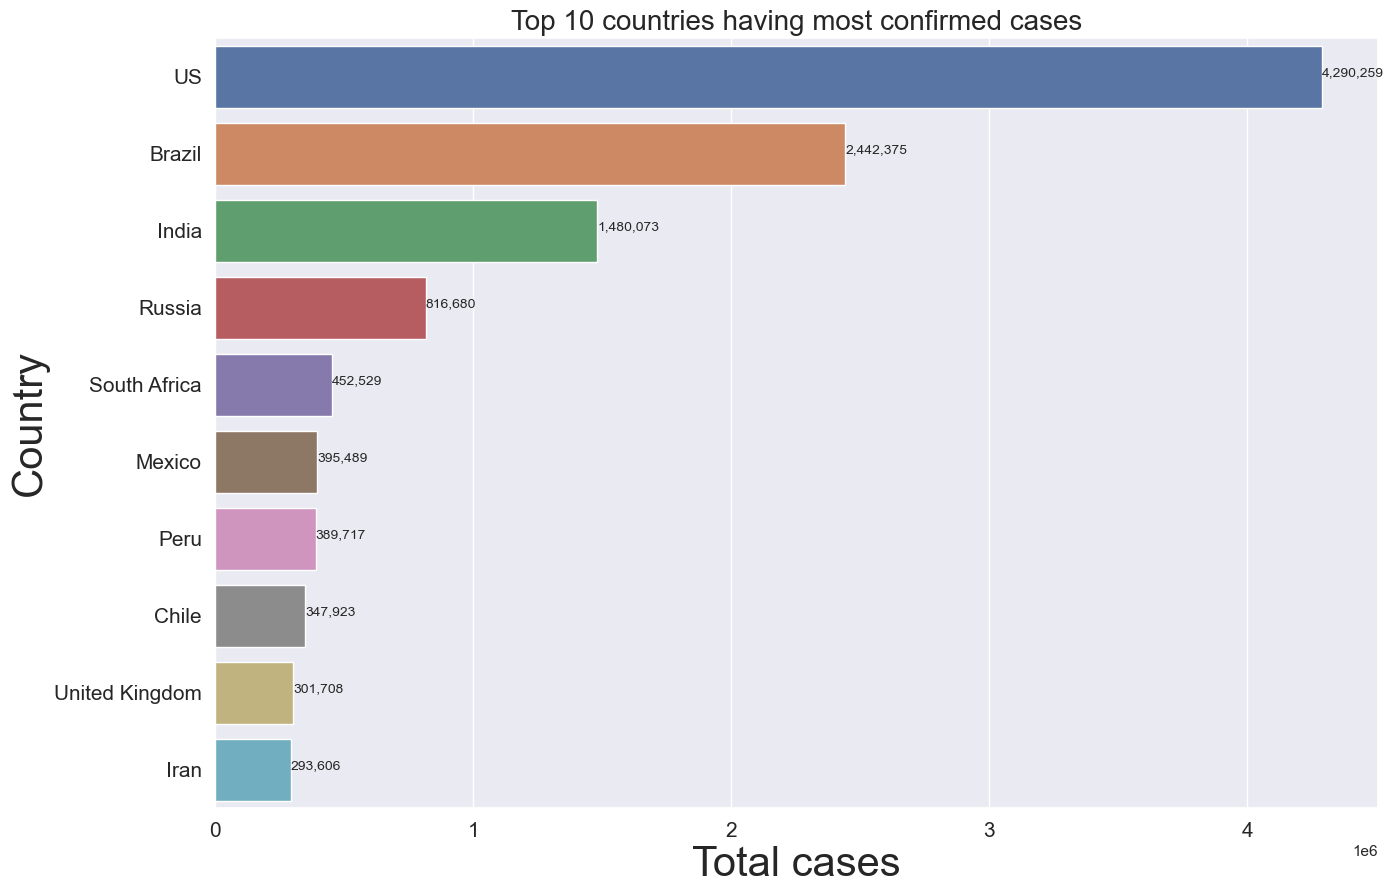

In [10]:
plt.figure(figsize= (14,5))

ax = sns.pointplot(x=total_cases['Date'],
                   y=total_cases['Confirmed'],
                   color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.title('Worldwide Confirmed Cases Over Time', fontsize=20)

with sns.axes_style('white'):
    
    g = sns.relplot(
        x="Date", 
        y="Deaths", 
        kind="line", 
        data=df
    )
    g.fig.autofmt_xdate()
    g.set_xticklabels(step=10)
    plt.title("Covid-19 Deaths, Year:2020", fontsize=16)

    top = df.loc[df['Date'] == df['Date'].max()]
    
    top_casualities = top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending =False).head(10).reset_index()
top_casualities

sns.set(style="darkgrid")
plt.figure(figsize= (15,10))

ax = sns.barplot(x=top_casualities['Confirmed'],
                 y=top_casualities['Country/Region'])

for i, (value, name) in enumerate(zip(top_casualities['Confirmed'], top_casualities['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases', fontsize=30)
plt.ylabel('Country', fontsize=30)
plt.title('Top 10 countries having most confirmed cases', fontsize=20)


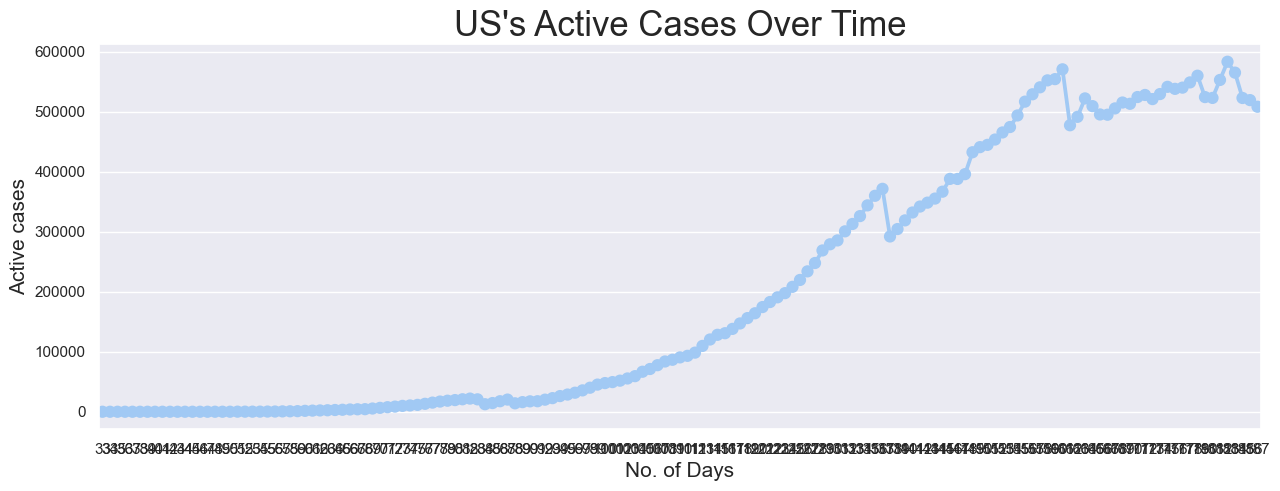

In [11]:
US_data = df.loc[df['Country/Region'] == 'Brazil', ['Date', 'Recovered', 'Deaths', 'Confirmed', 'Active']]
US_data.head()

US_data = US_data.groupby('Date').sum().reset_index()
US_data = US_data.iloc[33:]
US_data.head()

plt.figure(figsize=(15,5))
sns.set_color_codes("pastel")


sns.pointplot(x=US_data.index, y=US_data['Active'], color='b')

plt.xlabel('No. of Days', fontsize=15)
plt.ylabel('Active cases', fontsize=15)
plt.title("US's Active Cases Over Time", fontsize=25)

sns.set(style="whitegrid")


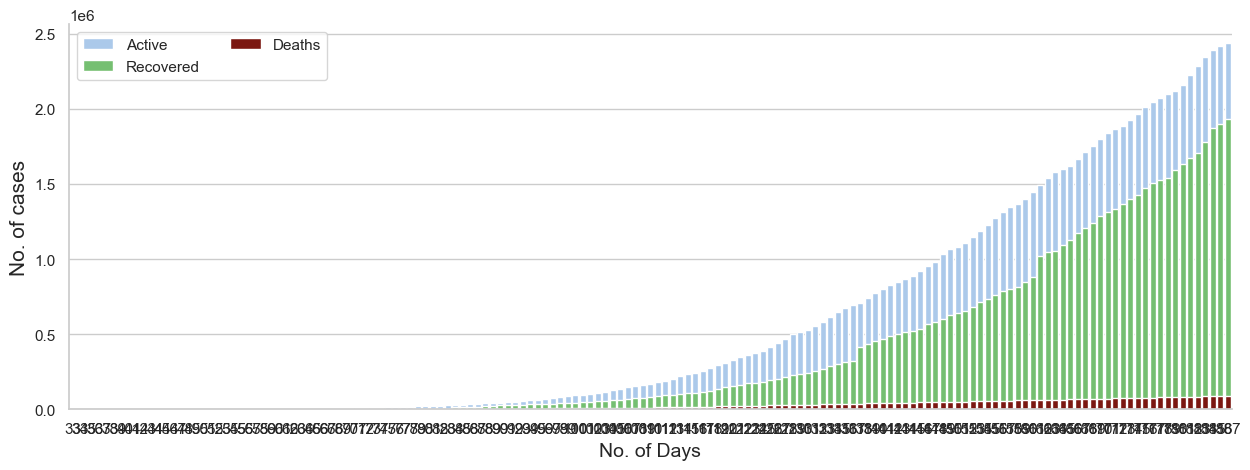

In [12]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 5))

# Plot the total cases
sns.set_color_codes("pastel")
sns.barplot(x=US_data.index, y=US_data.Active + US_data.Recovered + US_data.Deaths,
            label="Active", color="b")

# Plot the recovered
sns.set_color_codes("muted")
sns.barplot(x=US_data.index, y=US_data.Recovered + US_data.Deaths, 
            label="Recovered", color="g")

# Plot the Deaths
sns.set_color_codes("dark")
sns.barplot(x=US_data.index ,y=US_data.Deaths, 
            label="Deaths", color="r")

plt.xlabel('No. of Days', fontsize=14)
plt.ylabel('No. of cases', fontsize=15)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
sns.despine(top=True)

In [13]:
# Prepare data (convert date to numerical format)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)

# Define features (X) and target (y)
X = df[['Date']]  # Feature: Date
y = df['Confirmed']  # Target: Confirmed cases

# Split data into training and test sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 18838245490.75016


In [14]:

plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')  # Predicted data points
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Decision Tree')
plt.legend()
plt.show()


# Time-Series Modeling (ARIMA)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
model = ARIMA(train_df['Confirmed'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_df))
mse = mean_squared_error(test_df['Confirmed'], forecast)
print(f'RMSE: {np.sqrt(mse)}')

# Classification Modeling (Random Forest)
X = df[['Confirmed', 'Deaths', 'Recovered', 'Active']]
y = np.where(df['Confirmed'] > df['Recovered'], 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

SyntaxError: invalid non-printable character U+00A0 (273715826.py, line 1)